In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Predict the class, given a posterior
# probability (b) and a cutoff threshold (t)
def toClass(b, t=0.5):
    return('pos' if b>=t else 'neg')

In [3]:
df = pd.read_csv('../data/roc_2models_1.csv')

In [4]:
df

,instance,cond,model1,model2
0,1,pos,0.73,0.68
1,2,pos,0.69,0.67
2,3,neg,0.44,0.38
3,4,neg,0.55,0.33
4,5,pos,0.67,0.55
5,6,pos,0.47,0.46
6,7,neg,0.08,0.58
7,8,neg,0.15,0.50
8,9,pos,0.45,0.62
9,10,neg,0.35,0.56


In [5]:
# Sort the instances (for each model) according to the posterior probability
m1_sorted = df.sort_values('model1', ascending=False)[['instance', 'cond', 'model1']]
m2_sorted = df.sort_values('model2', ascending=False)[['instance', 'cond', 'model2']]
m1_sorted.columns = ['instance', 'cond', 'prob']
m2_sorted.columns = ['instance', 'cond', 'prob']

When we specify the label for the positive class to come first, we get this confusion matrix:

|| OP | ON |
|-|-|-|
|CP| TP | FN |
|CN| FP | TN |

In [6]:
# Set prediction threshold, then show confusion matrices
t = 0.5

# Get the predictions for both models
out1 = df['model1'].apply(toClass, t=t)
out2 = df['model2'].apply(toClass, t=t)

# Compute the confusion matrices for both models
conf_mx1 = confusion_matrix(df['cond'], out1, labels=['pos', 'neg'])
conf_mx2 = confusion_matrix(df['cond'], out2, labels=['pos', 'neg'])

print('Model 1:')
print(conf_mx1)
print('ACCURACY = {:.3f}'.format(accuracy_score(out1, df['cond'])))
print('-----------------------------')
print('Model 2:')
print(conf_mx2)
print('ACCURACY = {:.3f}'.format(accuracy_score(out2, df['cond'])))

Model 1:
[[3 2]
 [1 4]]
ACCURACY = 0.700
-----------------------------
Model 2:
[[4 1]
 [3 2]]
ACCURACY = 0.600


In [7]:
# Compute CP and CN
CP = sum(df['cond'] == 'pos')
CN = sum(df['cond'] == 'neg')

In [8]:
# X and Y arrays for plotting the ROC curve
X1 = [0]
Y1 = [0]

# AUC
auc = 0.0
lastfpr = 0.0

# Compute ROC Curve for model 1
for threshold in m1_sorted['prob']:
    out = m1_sorted['prob'].apply(toClass, t=threshold)
    tp = sum((m1_sorted['cond'] == 'pos') & (out == 'pos'))
    tn = sum((m1_sorted['cond'] == 'neg') & (out == 'neg'))
    fp = sum((m1_sorted['cond'] == 'neg') & (out == 'pos'))
    fn = sum((m1_sorted['cond'] == 'pos') & (out == 'neg'))
    tpr = tp / CP # recall
    fpr = fp / CN # fallout
    X1.extend([fpr])
    Y1.extend([tpr])
    print("t=%.2f: TP=%d, TN=%d, FP=%d, FN=%d, TPR=%.2f, FPR=%.2f" % (threshold, tp, tn, fp, fn, tpr, fpr))
    auc = auc + ((fpr-lastfpr)*tpr)
    lastfpr = fpr
X1.extend([1])
Y1.extend([1])
print("AUC (model 1): %.3f" % auc)

t=0.73: TP=1, TN=5, FP=0, FN=4, TPR=0.20, FPR=0.00
t=0.69: TP=2, TN=5, FP=0, FN=3, TPR=0.40, FPR=0.00
t=0.67: TP=3, TN=5, FP=0, FN=2, TPR=0.60, FPR=0.00
t=0.55: TP=3, TN=4, FP=1, FN=2, TPR=0.60, FPR=0.20
t=0.47: TP=4, TN=4, FP=1, FN=1, TPR=0.80, FPR=0.20
t=0.45: TP=5, TN=4, FP=1, FN=0, TPR=1.00, FPR=0.20
t=0.44: TP=5, TN=3, FP=2, FN=0, TPR=1.00, FPR=0.40
t=0.35: TP=5, TN=2, FP=3, FN=0, TPR=1.00, FPR=0.60
t=0.15: TP=5, TN=1, FP=4, FN=0, TPR=1.00, FPR=0.80
t=0.08: TP=5, TN=0, FP=5, FN=0, TPR=1.00, FPR=1.00
AUC (model 1): 0.920


In [677]:
# X and Y arrays for plotting the ROC curve
X2 = [0]
Y2 = [0]

# AUC
auc = 0.0
lastfpr = 0.0

# Compute ROC Curve for model 2
for threshold in m2_sorted['prob']:
    out = m2_sorted['prob'].apply(toClass, t=threshold)
    tp = sum((m2_sorted['cond'] == 'pos') & (out == 'pos'))
    tn = sum((m2_sorted['cond'] == 'neg') & (out == 'neg'))
    fp = sum((m2_sorted['cond'] == 'neg') & (out == 'pos'))
    fn = sum((m2_sorted['cond'] == 'pos') & (out == 'neg'))
    tpr = tp / CP # recall
    fpr = fp / CN # fallout
    X2.extend([fpr])
    Y2.extend([tpr])
    print("t=%.2f: TP=%d, TN=%d, FP=%d, FN=%d, TPR=%.2f, FPR=%.2f" % (threshold, tp, tn, fp, fn, tpr, fpr))
    auc = auc + ((fpr-lastfpr)*tpr)
    lastfpr = fpr
X2.extend([1])
Y2.extend([1])
print("AUC (model 2): %.3f" % auc)

t=0.68: TP=1, TN=5, FP=0, FN=4, TPR=0.20, FPR=0.00
t=0.67: TP=2, TN=5, FP=0, FN=3, TPR=0.40, FPR=0.00
t=0.62: TP=3, TN=5, FP=0, FN=2, TPR=0.60, FPR=0.00
t=0.58: TP=3, TN=4, FP=1, FN=2, TPR=0.60, FPR=0.20
t=0.56: TP=3, TN=3, FP=2, FN=2, TPR=0.60, FPR=0.40
t=0.55: TP=4, TN=3, FP=2, FN=1, TPR=0.80, FPR=0.40
t=0.50: TP=4, TN=2, FP=3, FN=1, TPR=0.80, FPR=0.60
t=0.46: TP=5, TN=2, FP=3, FN=0, TPR=1.00, FPR=0.60
t=0.38: TP=5, TN=1, FP=4, FN=0, TPR=1.00, FPR=0.80
t=0.33: TP=5, TN=0, FP=5, FN=0, TPR=1.00, FPR=1.00
AUC (model 2): 0.800


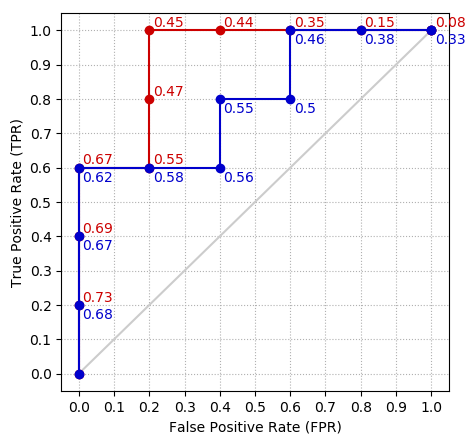

In [678]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0,1], [0,1], c='#CCCCCC') # gray reference line
plt.plot(X1, Y1, marker='o', c='#CC0000')
plt.plot(X2, Y2, marker='o', c='#0000CC')
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(linestyle='dotted')
plt.axis(xmin=-0.05, xmax=1.05, ymin=-0.05, ymax=1.05)
for ii in range(1, 11):
    plt.text(X1[ii]+0.01,Y1[ii]+0.01, m1_sorted.iloc[ii-1]['prob'], color='#cc0000')
    plt.text(X2[ii]+0.01,Y2[ii]-0.04, m2_sorted.iloc[ii-1]['prob'], color='#0000CC')
plt.show()

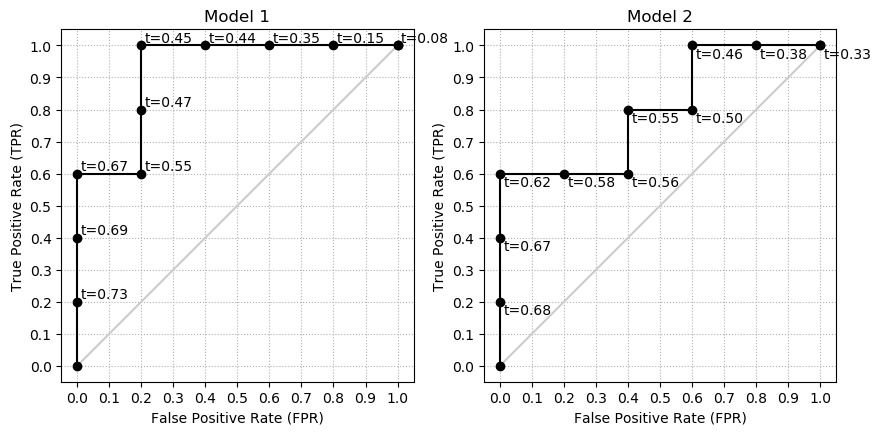

In [686]:
# Plot ROC curves on separate subplots
plt.figure(figsize=(10,5), dpi=100)

ax1 = plt.subplot(1,2,1, aspect=1.0)
ax1.plot([0,1], [0,1], c='#CCCCCC') # gray reference line
ax1.plot(X1, Y1, marker='o', c='#000000')
ax1.set_xticks(np.arange(0,1.1,0.1))
ax1.set_yticks(np.arange(0,1.1,0.1))
ax1.set_xlabel('False Positive Rate (FPR)')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.grid(linestyle='dotted')
ax1.axis(xmin=-0.05, xmax=1.05, ymin=-0.05, ymax=1.05)
for ii in range(1, 11):
    ax1.text(X1[ii]+0.01,Y1[ii]+0.01, 't={:.2f}'.format(m1_sorted.iloc[ii-1]['prob']), color='#000000')
ax1.set_title('Model 1')
    
ax2 = plt.subplot(1,2,2, aspect=1.0)
ax2.plot([0,1], [0,1], c='#CCCCCC') # gray reference line
ax2.plot(X2, Y2, marker='o', c='#000000')
ax2.set_xticks(np.arange(0,1.1,0.1))
ax2.set_yticks(np.arange(0,1.1,0.1))
ax2.set_xlabel('False Positive Rate (FPR)')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.grid(linestyle='dotted')
ax2.axis(xmin=-0.05, xmax=1.05, ymin=-0.05, ymax=1.05)
for ii in range(1, 11):
    ax2.text(X2[ii]+0.01,Y2[ii]-0.04, 't={:.2f}'.format(m2_sorted.iloc[ii-1]['prob']), color='#000000')
ax2.set_title('Model 2')

plt.show()

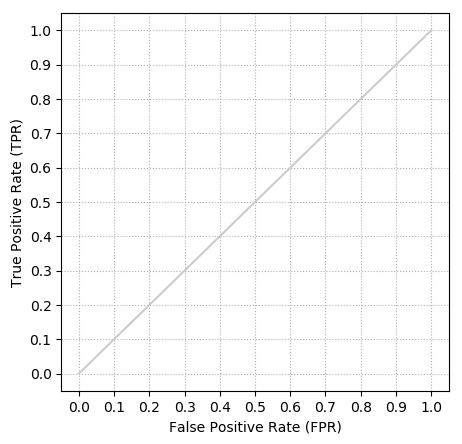

In [680]:
# Generate an empty plot suitable for framing (or printing)
plt.figure(figsize=(5,5), dpi=100)
plt.plot([], [])
plt.plot([0,1], [0,1], c='#cccccc') # red reference line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.axis(xmin=-0.05, xmax=1.05, ymin=-0.05, ymax=1.05)
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid(linestyle='dotted')
plt.show()